# This is the digit recognition kaggle project!!!

In [1]:
print("Digit recognition")

import tensorflow as tf
import tensorflow.keras as keras
# import tensorflow.nlp as nlp
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
# from tensorflow.nlp.layers import FourierTransformLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold
import pandas as pd
import sklearn
import csv
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
plt.style.use("ggplot")
np.random.seed(0)
tf.random.set_seed(0)


Digit recognition


/Users/ethanko/Library/Python/3.8/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
train = pd.read_csv('fall23-kaggle/train.csv')
test = pd.read_csv('fall23-kaggle/test.csv')

In [3]:
train_X = train.drop('label', axis=1).astype('float32') / 255.0
train_y = train['label']

test_x = test.astype('float32') / 255.0

In [4]:
test_x_np = test_x.to_numpy()
test_x_np = test_x_np.reshape(test_x_np.shape[0], 28, 28, 1)

In [5]:
train_X_np = train_X.to_numpy()
train_X_np = train_X_np.reshape(train_X_np.shape[0], 28, 28, 1)

train_y_np = train_y.to_numpy()

# print(train_X_np.shape)
train_y_np = to_categorical(train_y_np)
print(train_y_np)
# print(train_X.shape)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [18]:
# def define_model():
#     opt = SGD(learning_rate=0.001, momentum=0.9)

#     model = Sequential()
#     model.add(Conv2D(50, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
#     model.add(MaxPooling2D((2, 2), strides=(2,2)))
#     model.add(Conv2D(50, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
#     model.add(MaxPooling2D((2, 2), strides=(2,2)))
#     model.add(Flatten())
#     model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#     model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#     model.add(Dense(10, activation='softmax'))
#     model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

def define_model():
    opt = keras.optimizers.legacy.SGD(learning_rate=0.001, momentum=0.9)

    model = Sequential()
    model.add(Conv2D(50, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2), strides=(2,2)))
    model.add(Conv2D(50, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2,2)))
    model.add(Conv2D(50, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model



In [ ]:
modelTemp = define_model()
modelTemp.summary()

In [19]:
def evaluate_model(dataX, dataY, n_folds=5):
	bestScore = 0
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		if(acc > bestScore):
			bestScore = acc
			test_y = model.predict(
				test_x_np,
				batch_size=None,
				verbose='auto',
				steps=None,
				callbacks=None,
				max_queue_size=10,
				workers=1,
				use_multiprocessing=False
			)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories, test_y


In [20]:
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

In [21]:
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

In [22]:
scores, histories, test_y = evaluate_model(train_X_np, train_y_np)

875/875 [==============================] - 8s 9ms/step
> 98.571
875/875 [==============================] - 8s 9ms/step
> 98.690
875/875 [==============================] - 8s 9ms/step
> 98.762
> 98.429
> 98.286


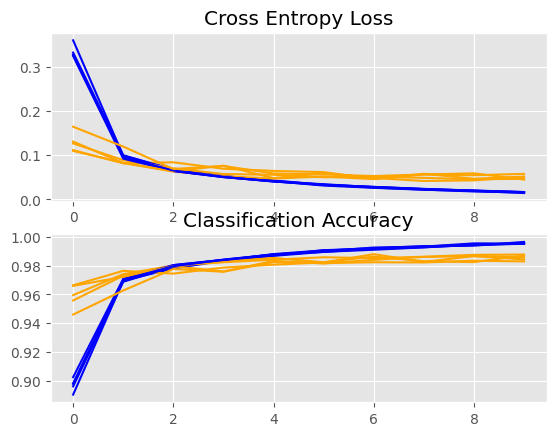

Accuracy: mean=98.548 std=0.173, n=5


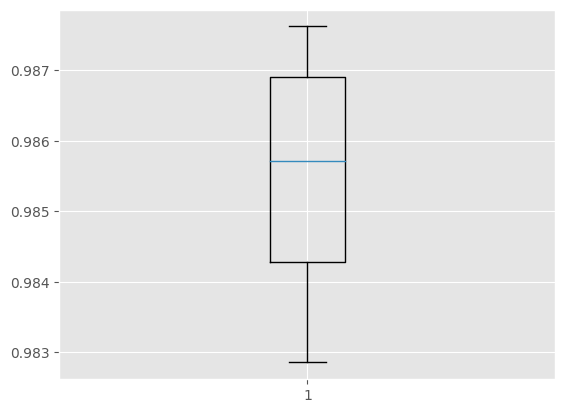

In [23]:
# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)

In [24]:
np.argmax(scores)

2

In [25]:
print(test_y.shape)

(28000, 10)


In [26]:
#Find the index with the largest value
#28000 images in test data
resultArr = np.ones((28000,2))
for i in range(28000):
    resultArr[i][0] = i+1
    resultArr[i][1] = int(np.argmax(test_y[i]))
resultArr = resultArr.astype('int')
for i in range(10):
    print(resultArr[i])


[1 2]
[2 0]
[3 9]
[4 9]
[5 3]
[6 7]
[7 0]
[8 3]
[9 0]
[10  3]


In [27]:
df = pd.DataFrame(resultArr)
df.to_csv("./submission.csv", header=False, index=False)